<a href="https://colab.research.google.com/github/jcdevaney/pyAMPACTtutorials/blob/main/pyAMPACT_underspecifiedScores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>pyAMPACT Introduction</h1>

In [ ]:
!git clone https://github.com/jcdevaney/pyAMPACTtutorials.git
from IPython.utils import io
print('Importing libraries...')
with io.capture_output() as captured:
    !pip install --upgrade pandas
    !pip install -i https://test.pypi.org/simple/ --no-deps pyampact==0.4.8
    import pyampact
import pandas as pd
import numpy as np
import librosa

Cloning into 'pyAMPACTtutorials'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 308 (delta 85), reused 17 (delta 14), pack-reused 177
Receiving objects: 100% (308/308), 17.42 MiB | 11.81 MiB/s, done.
Resolving deltas: 100% (146/146), done.
Importing libraries...


Load audio and symbolic files. Audio files can be any format supported by librosa (wav, mp3, flac, ogg, etc.) and symbolic files can be any format supported by music21 (kern, xml, mei, midi, abc, etc.).

The audio file should be read with librosa's `load` function and the symbolic file should be read into a Score object with pyAMPACT's `Score` function.

In [ ]:
audio_file = '/content/pyAMPACTtutorials/test_files/Mozart_K179_seg.wav'
midi_file = '/content/pyAMPACTtutorials/test_files/Mozart_K179_seg.krn'

y, original_sr = librosa.load(audio_file)

piece = pyampact.Score(midi_file)


	Detected and imported these spine types:
		 harm function 



DO WE WANT TO KEEP THE OPTION TO PUT IN NEW MEANS/COVARS OR SHOULD WE JUST HARDCODE THEM? IN EITHER CASE WE PROBABLY DON'T WANT THIS IN THE ALPHA RELEASE WHERE WE ARE JUST DOING DTW.

Load default means and covariances for alignment refinement (these can be replaced with instrument specific ones)

In [ ]:
means = pd.read_csv('https://raw.githubusercontent.com/jcdevaney/pyAMPACTtutorials/main/test_files/means.csv', sep=' ').values
covars = pd.read_csv('https://raw.githubusercontent.com/jcdevaney/pyAMPACTtutorials/main/test_files/covars.csv', sep=' ').values

Run the alignment with pyampact's `run_alignment` function.

You can specify the target sample rate (target_sr), window size in milliseconds (win_ms), the hop size (hop_length) as well as arguments that dictate the way that the symbolic file is represented as a spectrogram-like mask: the bin width of each note/harmonic (width) and the number of harmonics (n_harm).

CAN WE REMOVE THE PRINT-OUTS AND AUTOMATIC VISUALIZATION IN RUN_ALIGNMENT?

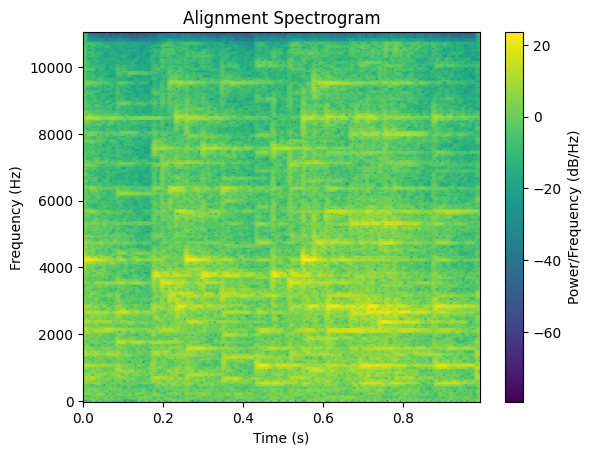

In [ ]:
target_sr = 4000
win_ms = 100
hop_length = 32
width = 3
n_harm = 3

# Visualize the alignment with True flag

res, dtw, spec, nmat = pyampact.run_alignment(
    y, original_sr, piece, piece.nmats(), width, target_sr, n_harm, win_ms, hop_length, True)

Estimate performance paramters.

In this example we are estimating F0 and power values for each note. See XXX notebook for examples of all of the performance parameters that can be estimated by pyAMPACT.

In [ ]:
# Calculate an instananeous frequency-gram of the audio signal
freqs, times, mags, f0_values, mags_mat = pyampact.ifgram(audiofile=audio_file, tsr=target_sr, win_ms=win_ms)
mags_db = librosa.amplitude_to_db(mags, ref=np.max)

# Estimate F0 values
f0_values, sig_pwr = pyampact.calculate_f0_est(audio_file, hop_length, win_ms, target_sr)
sig_pwr = mags ** 2 # power of signal, magnitude/amplitude squared

# Prune NaN and zero values from estimated F0 and power
f0_values = f0_values[~np.isnan(f0_values)]
sig_pwr = sig_pwr[sig_pwr != 0]

Compile estimated performance parameters

In [ ]:
# need to update the content of piece.nmats() with the output of this function
# or create a new member variable of piece called perfNmats that can be used for
# generating the json on the symbolic side using something like (which was previously in the dsp functions)
#
    # Convert each DataFrame to a dictionary
    # Create an empty dictionary to hold the structured data
#    dfs_dict = {}

#    for part, df in nmat.items():
#        part_data = {}
#        for xml_id, row in df.iterrows():
#            part_data[str(xml_id)] = row.to_dict()
#        dfs_dict[part] = part_data


    # Uncomment to export JSON
    # if not export_path.endswith("/"):
    #     export_path += "/"

    # audio_file_name = os.path.splitext(os.path.basename(audio_file_path))[0]
    # # output_file = f"./output_files/alignment_cdata_{audio_file_name}.json"
    # output_file = f"{export_path}{audio_file_name}.json"
    # with open(output_file, "w") as f:
    #     json.dump(dfs_dict, f, indent=4)

pyampact.data_compilation(f0_values, sig_pwr, mags_mat, nmat, target_sr, hop_length, y, audio_file)

{'Part-1':                  MEASURE     ONSET  DURATION    PART  MIDI  ONSET_SEC  \
XML_ID                                                                  
138841035990512        1   0.00000   2.00000  Part-1  79.0    0.00000   
138841035990368        1   2.00000   0.25000  Part-1  77.0    2.00000   
138841035982064        1   2.25000   0.25000  Part-1  76.0    2.25000   
138841035989984        1   2.50000   0.25000  Part-1  74.0    2.50000   
138841035989552        1   2.75000   0.25000  Part-1  72.0    2.75000   
138841035991280        2   3.00000   0.50000  Part-1  79.0    3.00000   
138841035990560        2   3.50000   0.50000  Part-1  77.0    3.50000   
138841035991424        2   4.00000   1.50000  Part-1  74.0    4.00000   
138841035991520        2   5.50000   0.50000  Part-1  77.0    5.50000   
138841035991712        3   6.00000   0.33333  Part-1  76.0    6.00000   
138841035991904        3   6.33333   0.33333  Part-1  79.0    6.33333   
138841035992144        3   6.66667   0.3

({'Part-1':                  MEASURE     ONSET  DURATION    PART  MIDI  ONSET_SEC  \
  XML_ID                                                                  
  138841035990512        1   0.00000   2.00000  Part-1  79.0    0.00000   
  138841035990368        1   2.00000   0.25000  Part-1  77.0    2.00000   
  138841035982064        1   2.25000   0.25000  Part-1  76.0    2.25000   
  138841035989984        1   2.50000   0.25000  Part-1  74.0    2.50000   
  138841035989552        1   2.75000   0.25000  Part-1  72.0    2.75000   
  138841035991280        2   3.00000   0.50000  Part-1  79.0    3.00000   
  138841035990560        2   3.50000   0.50000  Part-1  77.0    3.50000   
  138841035991424        2   4.00000   1.50000  Part-1  74.0    4.00000   
  138841035991520        2   5.50000   0.50000  Part-1  77.0    5.50000   
  138841035991712        3   6.00000   0.33333  Part-1  76.0    6.00000   
  138841035991904        3   6.33333   0.33333  Part-1  79.0    6.33333   
  1388410359921

Export estimated performance parameters to a kern or MEI file

In [ ]:
piece.toKern()

'!!!COM: Mozart\n!!!OTL: Zwolf Variationen in C uber ein Menuett von Johann Christian Fischer\n**kern\t**kern\n*part2\t*part1\n*staff2\t*staff1\n*Ivox\t*Ivox\n*I"Part-2\t*I"Part-1\n*I\'P\t*I\'P\n=1\t=1\n*clefF4\t*clefG2\n*k[]\t*k[]\n*M3/4\t*M3/4\n4C\t2gg\n4E\t.\n4C\t16ffLL\n.\t16ee\n.\t16dd\n.\t16ccJJ\n=2\t=2\n4D\t8ggL\n.\t8ffJ\n4BB\t4.dd\n4GG\t.\n.\t8ff\n=3\t=3\n8DL\t12eeL\n.\t12gg\n8FJ\t.\n.\t12aaJ\n4G\t4cc\n4GG\t4b\n=4\t=4\n4C\t4b\n4GG\t4cc\n4CC\t4r\n==\t==\n*-\t*-\n!!!RDF**kern: %=rational rhythm\n!!!RDF**kern: l=long note in original notation\n!!!RDF**kern: i=editorial accidental\n!!!ONB: Translated from a krn file on 2024-03-14 via pyAMPACT\n!!!title: @{OTL}'

In [ ]:
piece.toMEI()